# Artificial Neural Network

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import sys


def VerzeichnisPfad():
    folderPath = os.getcwd()

    print("folderPath: ", folderPath)
    os.chdir("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
    neueVerzeichnisPfad = os.getcwd()

    print("folderPath neu: ", neueVerzeichnisPfad)

def loadExcelFile():
    file = "Autoform_1000.xlsx"
    dataFrame = pd.ExcelFile(file)
    print("dataFrame: ", dataFrame)
    x = np.random.uniform(0, 1, 20)
    print(x)

def artificialNeuralNetwork():
    print(sys.argv)
    folderPath = os.getcwd()
    print("folderPath: ", folderPath)
    os.chdir("C:\\Users\\zoint\Desktop\\Fraunhofer\\VorschlagFraunhofer")
    X_file = np.genfromtxt('Autoform_1000.csv', delimiter = ',', skip_header=1)
    print(X_file[:, 1])
    N = np.shape(X_file)[0]
    X = np.hstack((np.ones(N).reshape(N, 1), X_file[:, 4].reshape(N, 1)))
    Y =  X_file[:, 0]
    #Standardize the input
    X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])
    print("new values", X[:, 1])
    #
    w = np.array([0, 0])

    ##update the weight
    max_iter = 1000
    eta = 1E-3
    for t in range(0, max_iter):
        grad_t = np.array([0., 0.])
        for i in range(0, N):
            x_i = X[i, :]
            y_i = Y[i]
            h = np.dot(w, x_i) - y_i
            grad_t += 2 * x_i * h

        w = w - eta * grad_t
    tt = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
    bf_line = w[0]+w[1]*tt

    plt.plot(X[:, 1], Y, 'kx', tt, bf_line, 'r-')
    plt.xlabel('Weight (Normalized)')
    plt.ylabel('Thickness and the rest of the parameters')
    plt.title('Artificial Neural Network Regression')
    plt.show()
artificialNeuralNetwork()

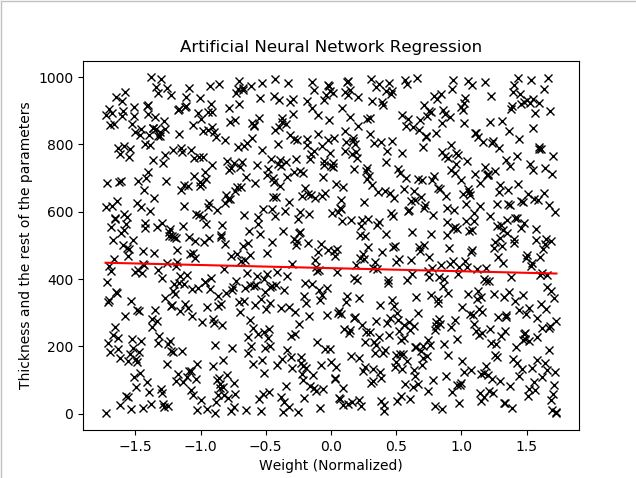

# Linear Regression with Artificial Neural Network

In [ ]:
First of all, we will import library and fix our folder path.

In [24]:
if(!require(readxl)) {
  install.packages("readxl"); require(readxl)
}
if(!require(neuralnet)) {
  install.packages("neuralnet"); require(neuralnet)
}
if(!require(hydroGOF)) {
  install.packages("hydroGOF"); require(hydroGOF)
}


currentDirectory <- getwd()

setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()

my_data <- read_excel("Autoform_1000.xlsx")


Loading required package: hydroGOF
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'hydroGOF'"Installing package into 'C:/Users/zoint/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'intervals', 'spacetime', 'FNN', 'e1071', 'gstat', 'automap', 'sp', 'maptools', 'hydroTSM'



package 'intervals' successfully unpacked and MD5 sums checked
package 'spacetime' successfully unpacked and MD5 sums checked
package 'FNN' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'gstat' successfully unpacked and MD5 sums checked
package 'automap' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'hydroTSM' successfully unpacked and MD5 sums checked
package 'hydroGOF' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\zoint\AppData\Local\Temp\RtmpieTxf3\downloaded_packages


Loading required package: hydroGOF
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [25]:
#Clear data from blank values
apply(my_data, 2, function(x) sum(is.na(x)))

sim# 
                                                   0 
                                           thickness 
                                                   0 
                           TransportTimeAfterHeating 
                                                   0 
                    EnforcedTemperatureOfEntireSheet 
                                                   0 
                                 QuenchingTimeInTool 
                                                   0 
                                      QuenchingForce 
                                                   0 
                                             spacing 
                                                   0 
                              DefaultToolTemperature 
                                                   0 
                                          HARDNESSP1 
                                                   0 
                                          HARDNESSP2 
                                                   0 
                                          HARDNESSP3 
                                                   0 
                                         THICKNESSP1 
                                                   0 
                                         THICKNESSP2 
                                                   0 
                                         THICKNESSP3 
                                                   0 
                                     RUECKFEDERUNGP4 
                                                   0 
                                     RUECKFEDERUNGP5 
                                                   0 
                                                X__1 
                                                 999 
                                                X__2 
                                                 999 
| AutoForm-SIGMA: Scatter Data Dump (MIME: text/csv) 
                                                 991

In [26]:
#model linear regression
index = sample(1:nrow(my_data), round(0.50 * nrow(my_data)))
# test = my_data[1:400,1:9]
# train = my_data[401:999,1:9]
test <- my_data[-index, 1:9]
train <- my_data[index, 1:9]


In [27]:
lm.fit <- glm(HARDNESSP1~., data=train)
print(summary(lm.fit))
lm.predict <- predict(lm.fit, test)
MSE.lm <- sum((lm.predict - test$HARDNESSP1)^2) /nrow(test)
RMSE.LM=rmse(lm.predict,test$HARDNESSP1)

print(MSE.lm)


Call:
glm(formula = HARDNESSP1 ~ ., data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-36.625225   -7.068664    1.058403    6.802168   35.210121  

Coefficients:
                                          Estimate        Std. Error   t value
(Intercept)                      -469.469309884685   36.953802508478 -12.70422
`sim#`                             -0.001606017816    0.001587711028  -1.01153
thickness                          21.306952808354   16.015880914279   1.33036
TransportTimeAfterHeating          -6.126423781682    0.107678187065 -56.89568
EnforcedTemperatureOfEntireSheet    1.058352788256    0.031407667477  33.69727
QuenchingTimeInTool                 0.332037226887    0.196201962456   1.69232
QuenchingForce                      0.000003600278    0.000001062082   3.38983
spacing                             1.122425525571    0.841601946529   1.33368
DefaultToolTemperature             -0.079780251657    0.007331662056 -10.88161


# Construct an Artificial Neural Network

In [28]:
maxs <- apply(my_data[1:9], 2, max)
mins <- apply(my_data[1:9], 2, min)

scaled <- as.data.frame(scale(my_data[1:9], center = mins, scale = maxs - mins))
trainNN <- scaled[index, 1:9]
testNN <- scaled[-index, 1:9]


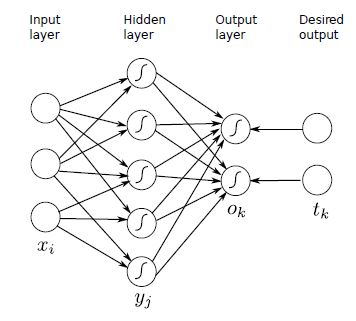

In [29]:
f <- as.formula(paste("HARDNESSP1 ~ ", paste("`sim#` + thickness + TransportTimeAfterHeating + EnforcedTemperatureOfEntireSheet + QuenchingTimeInTool + QuenchingForce + spacing + DefaultToolTemperature")))
#hidden neuran number = input size * 2/3
NN = neuralnet(f, data=trainNN, hidden = c(5) , linear.output = TRUE, threshold = 0.01)
plot(NN)

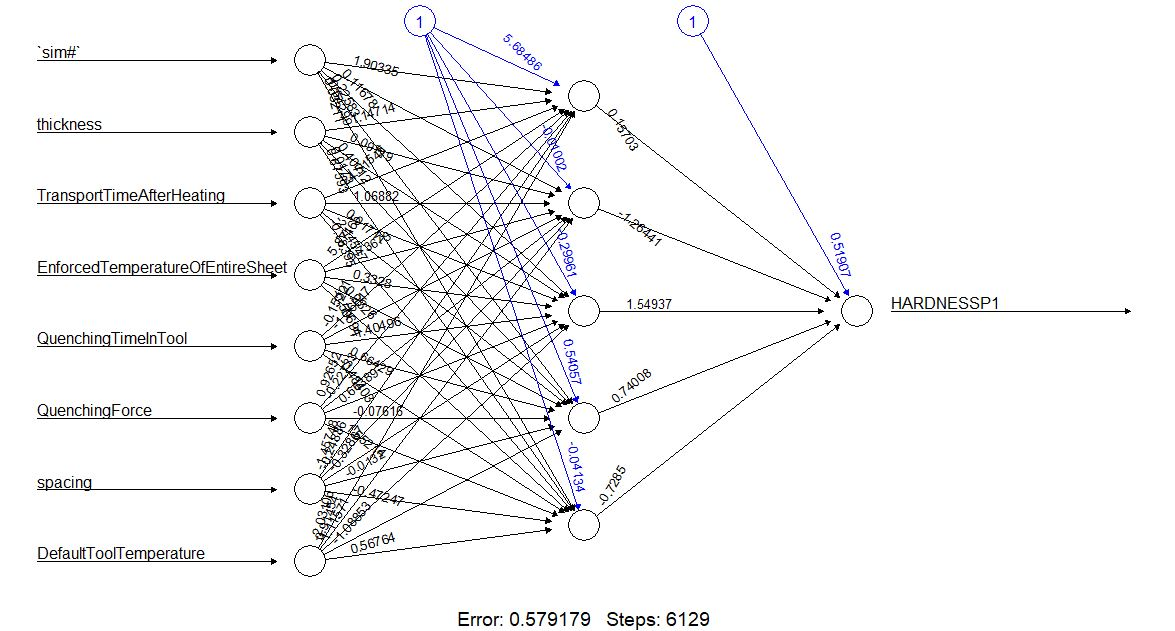

In [30]:
temp_test <- subset(testNN, select=c("sim#", "thickness", "TransportTimeAfterHeating", "EnforcedTemperatureOfEntireSheet", "QuenchingTimeInTool", "QuenchingForce", "spacing", "DefaultToolTemperature"))
# print(temp_test)
predictedNN <- neuralnet::compute(NN, temp_test)

predictedNN_test <- predictedNN$net.result * (max(my_data[1:9]$HARDNESSP1) - min(my_data[1:9]$HARDNESSP1)) + min(my_data[1:9]$HARDNESSP1)
testPredict <- (testNN$HARDNESSP1) * (max(my_data[1:9]$HARDNESSP1) - min(my_data[1:9]$HARDNESSP1)) + min(my_data[1:9]$HARDNESSP1)
MSE.nn <- sum((testPredict - predictedNN_test)^2) / nrow(testNN)


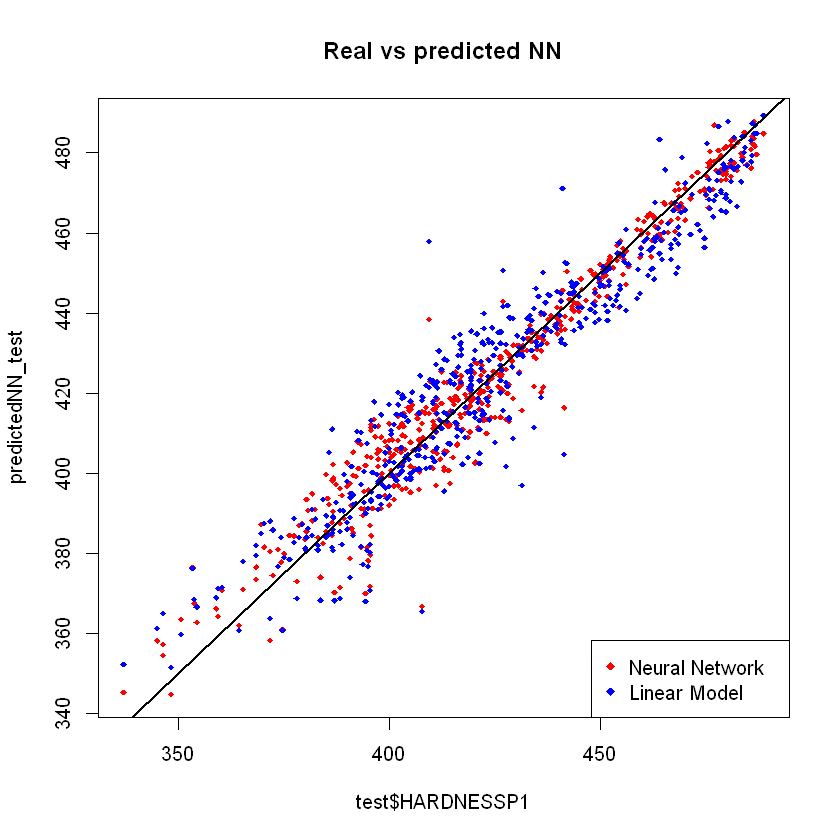

In [31]:
plot(test$HARDNESSP1,predictedNN_test,col='red',main='Real vs predicted NN',pch=18,cex=0.7)
points(test$HARDNESSP1,lm.predict,col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('Neural Network','Linear Model'),pch=18,col=c('red','blue'))

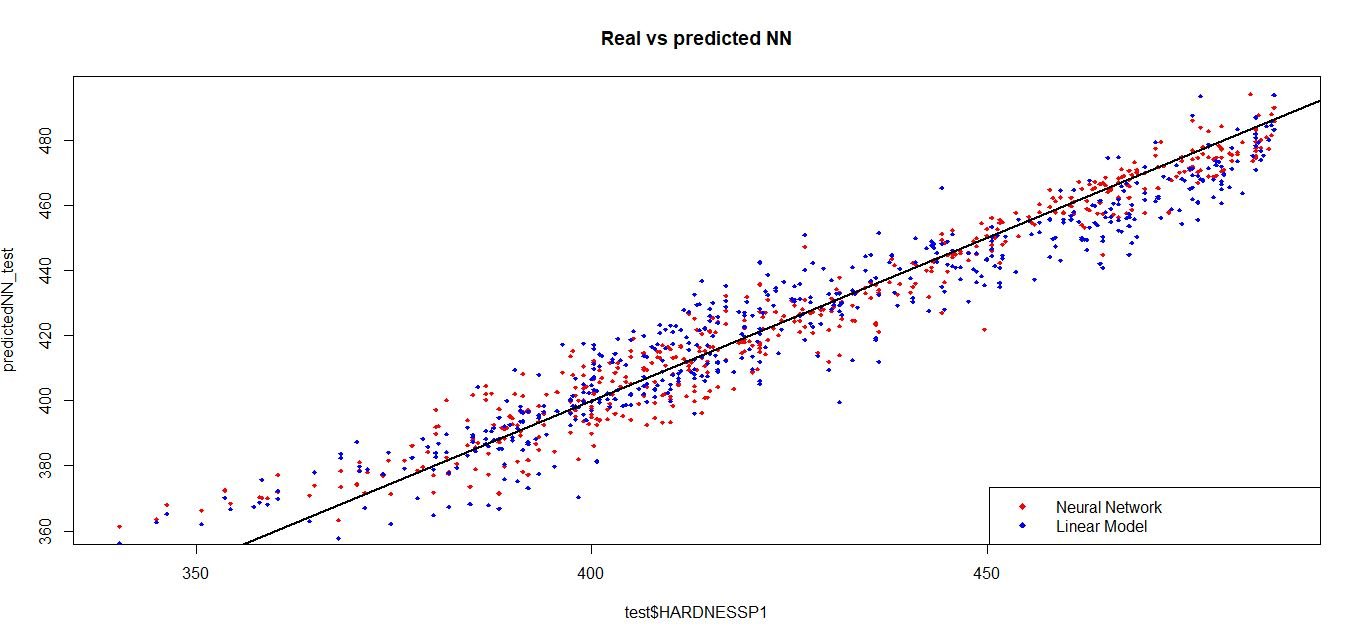

In [34]:
# # Calculate Root Mean Square Error (RMSE)
RMSE.NN = sqrt(mean(testPredict - predictedNN_test) ^ 2)
print(paste0 ("RMSE NN and RMSE LM ", paste(RMSE.NN, RMSE.LM)))
print(paste0("MSE NN and MSE LM ", paste(MSE.nn, MSE.lm)))

[1] "RMSE NN and RMSE LM 0.0156052849965971 10.0616072791065"
[1] "MSE NN and MSE LM 53.8076712015467 101.235941038968"


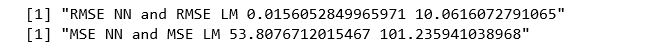